# Name: Navaneeswar reddy

Data science And Business analytics internship

GRIPNO2020

Task 2:From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

Prediction Using Unsupervised ML.

Import all libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline

#Importing our data set

In [8]:
dataset=pd.read_csv("D:\iris.csv")

In [9]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [12]:
dataset.shape

(150, 6)

In [14]:
dataset.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [15]:
dataset.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [16]:
dataset.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [19]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [26]:
dataset.Species

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

Visualizing data

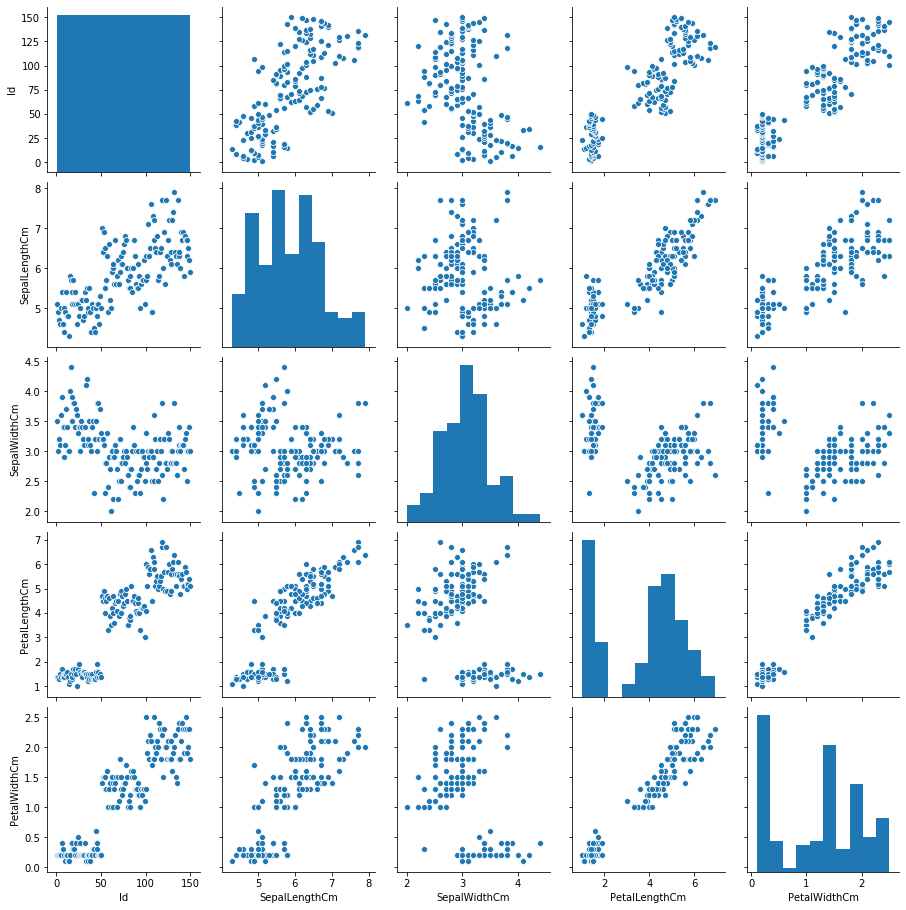

In [33]:
sns.pairplot(dataset)

In [35]:
import seaborn as sb

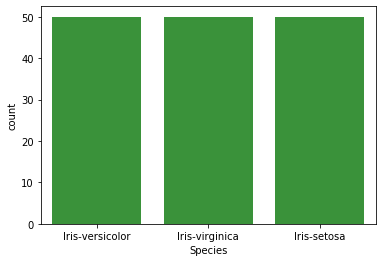

In [38]:
base = sb.color_palette()[2]
sorted = dataset['Species'].value_counts().index
sb.countplot(data = dataset , x = 'Species', order = sorted, color = base);

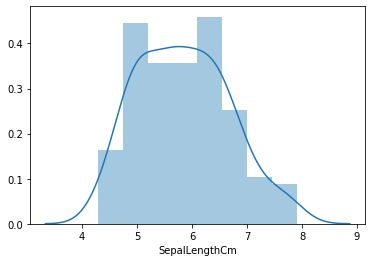

In [39]:
# Ploting sepal lengthcm
sb.distplot(dataset['SepalLengthCm']);


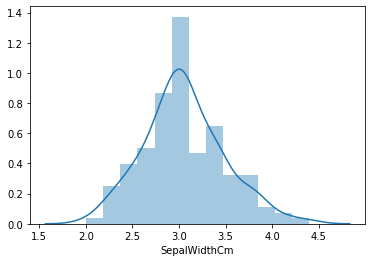

In [40]:
# Ploting sepal widthcm
sb.distplot(dataset['SepalWidthCm']);

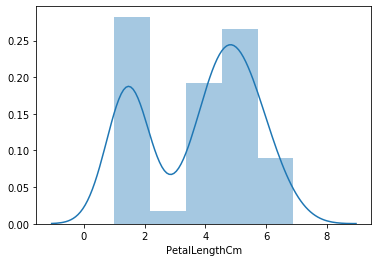

In [41]:
# Ploting petal lengthcm
sb.distplot(dataset['PetalLengthCm']);

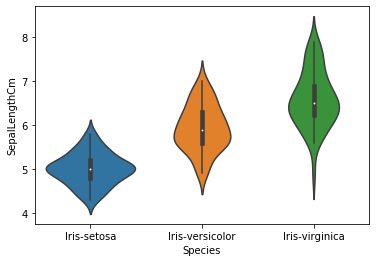

In [42]:
sb.violinplot(data = dataset, x = 'Species', y = 'SepalLengthCm');

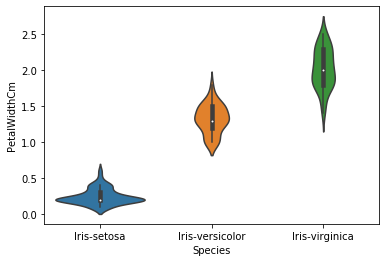

In [43]:
sb.violinplot(data = dataset, x = 'Species', y = 'PetalWidthCm');


In [45]:
# Drop id column and species column to check correlation between the other features

dataset_mod = dataset.drop(columns=['Id','Species'], axis = 1)
dataset_mod.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


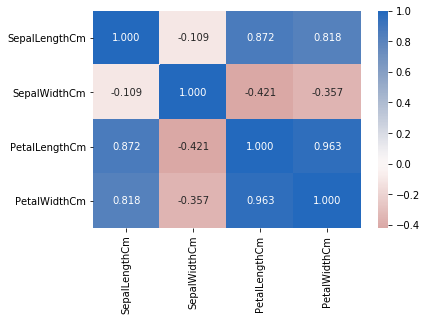

In [47]:
# Heat Map
sb.heatmap(dataset_mod.corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0);

# Elbow Method

A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k.



# Running K-Means with range of k
We can easily run K-Means for a range of clusters using a for loop and collecting the distortions into a list.

# What is Distortions ?
It is calculated as the average of the squared distances from the cluster centers of the respective clusters. Typically, the Euclidean distance metric is used.

Inertia: It is the sum of squared distances of samples to their closest cluster center.

In [57]:
from sklearn.cluster import KMeans
x = dataset.iloc[:, [0, 1, 2, 3]].values
print(x)
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(x)
    distortions.append(kmeanModel.inertia_)
    
print(distortions)

[[  1.    5.1   3.5   1.4]
 [  2.    4.9   3.    1.4]
 [  3.    4.7   3.2   1.3]
 [  4.    4.6   3.1   1.5]
 [  5.    5.    3.6   1.4]
 [  6.    5.4   3.9   1.7]
 [  7.    4.6   3.4   1.4]
 [  8.    5.    3.4   1.5]
 [  9.    4.4   2.9   1.4]
 [ 10.    4.9   3.1   1.5]
 [ 11.    5.4   3.7   1.5]
 [ 12.    4.8   3.4   1.6]
 [ 13.    4.8   3.    1.4]
 [ 14.    4.3   3.    1.1]
 [ 15.    5.8   4.    1.2]
 [ 16.    5.7   4.4   1.5]
 [ 17.    5.4   3.9   1.3]
 [ 18.    5.1   3.5   1.4]
 [ 19.    5.7   3.8   1.7]
 [ 20.    5.1   3.8   1.5]
 [ 21.    5.4   3.4   1.7]
 [ 22.    5.1   3.7   1.5]
 [ 23.    4.6   3.6   1. ]
 [ 24.    5.1   3.3   1.7]
 [ 25.    4.8   3.4   1.9]
 [ 26.    5.    3.    1.6]
 [ 27.    5.    3.4   1.6]
 [ 28.    5.2   3.5   1.5]
 [ 29.    5.2   3.4   1.4]
 [ 30.    4.7   3.2   1.6]
 [ 31.    4.8   3.1   1.6]
 [ 32.    5.4   3.4   1.5]
 [ 33.    5.2   4.1   1.5]
 [ 34.    5.5   4.2   1.4]
 [ 35.    4.9   3.1   1.5]
 [ 36.    5.    3.2   1.2]
 [ 37.    5.5   3.5   1.3]
 

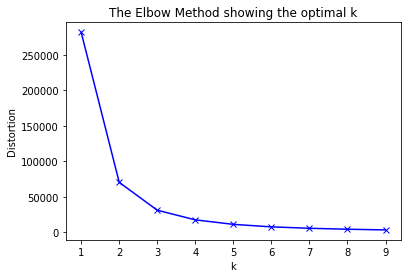

In [58]:
#Plotting Distortions of K-Means

plt.figure()
plt.plot(K, distortions,'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [59]:
iris_k_mean_model = KMeans(n_clusters=3)
iris_k_mean_model.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [60]:
print (iris_k_mean_model.labels_)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [61]:
#predicated output
y_kmeans = np.choose(iris_k_mean_model.labels_, [0, 1, 2]).astype(np.int64)
y_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

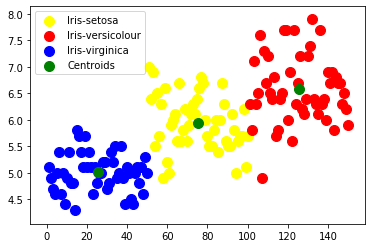

In [62]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'yellow', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'red', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'blue', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(iris_k_mean_model.cluster_centers_[:, 0], iris_k_mean_model.cluster_centers_[:,1], 
            s = 100, c = 'green', label = 'Centroids')

plt.legend()

In [64]:
Species = ['Iris-setosa', 'Iris-versicolour','Iris-virginica']
Species_ = []
for i in y_kmeans:
    Species_.append(Species[i])

In [65]:
Species_

['Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 '

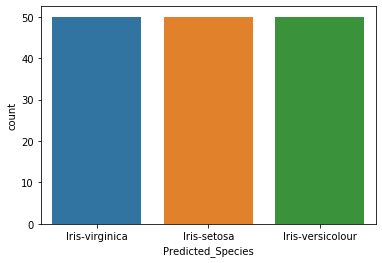

In [67]:
dataset['Predicted_Species'] = Species_
sns.countplot(dataset['Predicted_Species'])